In [127]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
# splits word into bigrams (pairs of two charaters) then counts up the occurrences of each bigram in the whole dataset
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): #this works because zip exits when one element of the itorator is shorter than the other
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [5]:
# sorts the list by occurrences
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
# Creates a 27, 27 (every character in the alphabet + . which acts as start / end token) torch tensor filled with zeros
# This allows each bigram to be given an element in the tensor where we can store the occurrences
N = torch.zeros((27, 27), dtype=torch.int32)
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


In [7]:
# indexes each char including start / end token at ix = 0
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [8]:
# stores the occurrences for each bigram in the (27, 27) tensor
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]): #this works because zip exits when one element of the itorator is shorter than the other
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

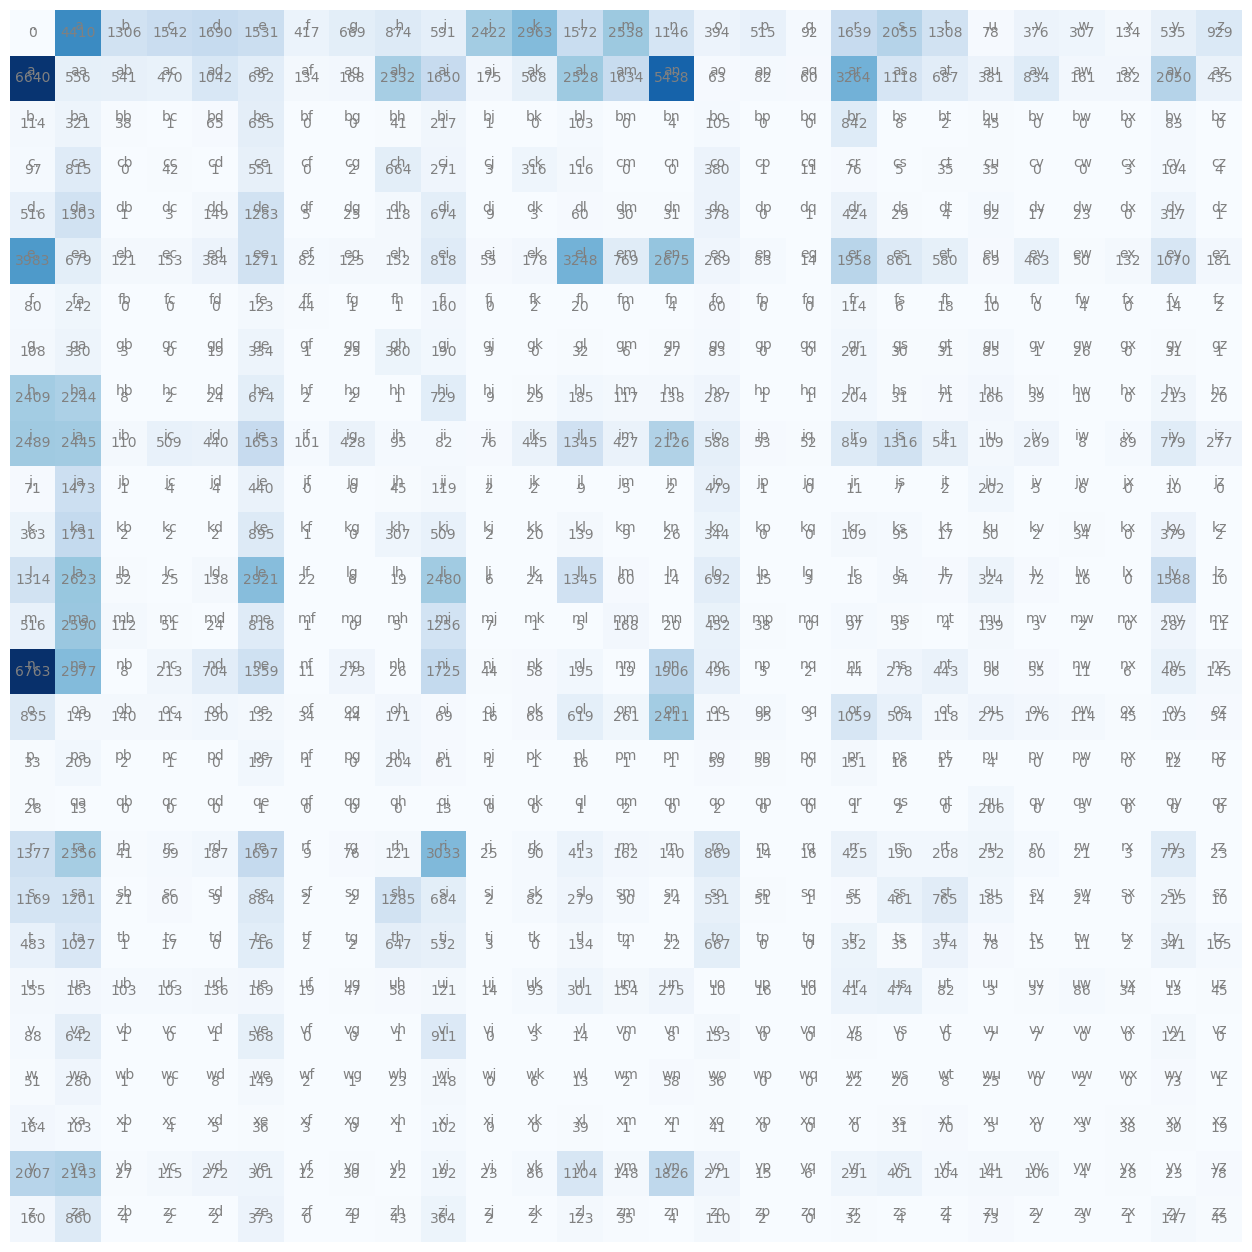

In [68]:
# visual, no actual functionality
plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="center", color='gray')
plt.axis('off');

In [9]:
# takes the first row of the tensor and normalizes the value
# used to show process, no functionality
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [11]:
# shows how multinomial chooses samples from a given probability distrobution.
# Returns tensors so .item() is used to grab index
# used as example, no functionality
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [119]:
# creates a full probability distribution from the count tensor
# N + 1 is called model smoothing. Makes it so we don't get infinite loss for a digram with 0 occurrences
P = (N + 1).float()
P /= P.sum(1, keepdims=True)
P.shape

torch.Size([27, 27])

In [120]:
# uses a generator for randomness. Setting seed makes randomness deterministic.
# In practice there will be no set seed unless testing
g = torch.Generator().manual_seed(2147483647)

# creates 5 randomly generated 'names' using the probability distribution P
for i in range(5):
    out = []
    ix = 0 # Chooses the top row, makes sure it starts with starting letters. 
    while True:
        p = P[ix] #sets probability distribution to row index of previous letter
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # appends next letter to out
        out.append(itos[ix])

        if ix == 0:
            break # breaks if next letter is .

    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [123]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2] # grabs the probability for each bigram from prob distro
        logprob = torch.log(prob) # gives the log of prob. Gets closer to 0 as prob -> 1
        log_likelihood += logprob
        n += 1
        
nll = -log_likelihood # works as a loss function. As each prob gets closer to 1, nll gets closer to 0
print(f'{nll=}')
print(f'Avg nll={nll/n}') # average log likelihood. This is our target loss after NN

nll=tensor(559951.5625)
Avg nll=2.4543561935424805


In [193]:
# Creating the training set for the NN with form (x, y)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs) # features
ys = torch.tensor(ys) # targets / labels
num = xs.nelement()
# when x is input to NN, y is expected output

# NN initialization
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [194]:
# grad descent
for k in range(100):

    # forward pass of NN
    xenc = F.one_hot(xs, num_classes=27).float() # one hot encodes all the xs so it can be fed into NN. 27 classes for 27 chars
    logits = xenc @ W # matrix multiplication in pytorch. Output of "NN"
    counts = logits.exp() # exponentiates the outputs. Makes positive. Equivalent to the N tensor from way before
    probs = counts / counts.sum(1, keepdims=True) # normalizes the counts making them probs
    # These last two lines are the softmax activation functionb
    # loss = the mean neg log of the probability that the NN picks the correct next char
    # added onto the loss (0.01 * (W**2).mean()) is the same as smoothing from before (N + 1)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()
    
    print(loss.item())
    
    # backward pass
    W.grad = None # set gradient to 0
    loss.backward()
    
    # updating weights
    W.data += -50 * W.grad

3.7686190605163574
3.3787856101989746
3.1610774993896484
3.027181625366211
2.9344801902770996
2.8672285079956055
2.816653251647949
2.777146100997925
2.745253562927246
2.7188308238983154
2.6965057849884033
2.6773722171783447
2.6608054637908936
2.6463515758514404
2.633665084838867
2.622471332550049
2.6125476360321045
2.6037063598632812
2.595794439315796
2.5886807441711426
2.5822560787200928
2.5764293670654297
2.5711233615875244
2.566272497177124
2.5618226528167725
2.5577261447906494
2.5539441108703613
2.5504424571990967
2.5471925735473633
2.5441696643829346
2.5413525104522705
2.538722038269043
2.536261796951294
2.5339581966400146
2.5317976474761963
2.5297679901123047
2.527859926223755
2.526063919067383
2.5243709087371826
2.522773027420044
2.521263837814331
2.519836902618408
2.5184857845306396
2.517205238342285
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704444885254
2.5107579231262207
2.509854793548584
2.5089921951293945
2.5081686973571777
2.50738048553

In [195]:
# sampling from NN

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W #predict log counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probs for next char
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
            
    print(''.join(out))

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
